In [1]:
# ! uv pip install pyoso

In [2]:
from dotenv import load_dotenv
import matplotlib.dates as mdates
import os
import pandas as pd
from pyoso import Client

load_dotenv()

OSO_API_KEY = os.environ['OSO_API_KEY']
client = Client(api_key=OSO_API_KEY)

# Step 1: Query the primary source models for 4337 data

In [3]:
# Preview the 4337 trace data
client.to_pandas("""
SELECT *
FROM stg_superchain__4337_traces
ORDER BY block_timestamp DESC
LIMIT 5
""")

,chain,block_timestamp,transaction_hash,userop_hash,method_id,from_address,to_address,bundler_address,paymaster_address,userop_gas_cost,userop_gas_used,value
0,WORLDCHAIN,2025-07-15 23:59:59.000,0x2bd8cca2d062695d413f984a807b332b4d008c31f817...,0x2334be379707f1bb3763e58c5cde234b7d43d17db2ec...,0x7bb37428,0x0c5433b60f8a3d17d745dcf6595a066280d4fb94,0x75cf11467937ce3f2f357ce24ffc3dbf8fd5c226,0x08f9d9ed674c8cc0fae04fd24a5a22a973682cce,0xef725aa22d43ea69fb22be2ebe6eca205a6bcf5b,193942311600,1563950,0.000000000000000000
1,WORLDCHAIN,2025-07-15 23:59:59.000,0xee2cd146b3c9dd4c500da78dfc4076ea6248c698d8eb...,0x58ee3bb8e3fe288fb33298c68b394585abd6d94e5b30...,0x7bb37428,0xab6c56b44630eefe024def29cc22d14b5667d984,0x75cf11467937ce3f2f357ce24ffc3dbf8fd5c226,0x3f0fddb9f9c6863a729f49ddc5fa7f6fdcab59a1,0xef725aa22d43ea69fb22be2ebe6eca205a6bcf5b,188195408856,1517607,0.000000000000000000
2,WORLDCHAIN,2025-07-15 23:59:59.000,0x473f6af3261487bb265ca540158d5fcf64e606e04c95...,0xdce663ae82454eb04980b57294c9bbd37bac028e806e...,0x7bb37428,0x2961db04fdcc8d36b1f4b49a51ab5fdfabcc8348,0x75cf11467937ce3f2f357ce24ffc3dbf8fd5c226,0x3d75430d3b4ebf09980bb6c8103f799b9ad33478,0xef725aa22d43ea69fb22be2ebe6eca205a6bcf5b,191681273736,1545717,0.000000000000000000
3,WORLDCHAIN,2025-07-15 23:59:59.000,0xe3bdda99d1c2be910a57c74257ebc5c83ce47e7ae118...,0x6cc43ab36789eef8b3f29bd5889f26d3198796df94db...,0x7bb37428,0x8ceb06229fae4b55c80101c11e0e4c87089d8615,0x75cf11467937ce3f2f357ce24ffc3dbf8fd5c226,0x2fbf4c11589b8a96a6da17a9c19cc51460aaec65,0xef725aa22d43ea69fb22be2ebe6eca205a6bcf5b,248523564744,2004093,0.000000000000000000
4,WORLDCHAIN,2025-07-15 23:59:59.000,0xa250dc5320894d5f27b374d8b4087b7fb7fe73a0a830...,0x5f4d1391797589f40e126fed8d105cbbc607db1df7d5...,0x7bb37428,0x65fc2b334ec0b55d331411cbbe893b9603fdda0a,0x75cf11467937ce3f2f357ce24ffc3dbf8fd5c226,0x21209abe8198443e533acc0af229f6901d633036,0xef725aa22d43ea69fb22be2ebe6eca205a6bcf5b,124583273112,1004639,0.000000000000000000


In [4]:
# Preview the 4337 logs data
client.to_pandas("""
SELECT *
FROM stg_superchain__4337_userop_logs
ORDER BY block_timestamp DESC
LIMIT 5
""")

,block_timestamp,transaction_hash,log_index,userop_hash,sender_address,paymaster_address,contract_address,userop_gas_price,userop_gas_used,chain
0,2025-07-15 23:59:59.000,0x6c1a2829ff884fb53a4e88c8c38e707105e6f63770ef...,353,0x0a4f04192639e2723c98a7e53257c4470c645e342c8e...,0x7c8d2a65057e4d6375e2142e975e597f2637a5a9,0x0000000000000000000000000000000000000000,0x0000000071727de22e5e9d8baf0edac6f37da032,827452438482,133073,BASE
1,2025-07-15 23:59:59.000,0x3fd83e52658035893398704b5003116b45cadeffedaf...,453,0x7a58c36ae8da5fa0d2bfd9d21d23ffe65591b067ede1...,0x4888c3ed39106f63ed05565a0c01ffb59020aad9,0x0000000000000000000000000000000000000000,0x0000000071727de22e5e9d8baf0edac6f37da032,4600364027914,751321,BASE
2,2025-07-15 23:59:59.000,0x9ba9f3dbcd7b88409848909fc4b632bcc45830de1cb4...,312,0xece684208fd4bd7fa613311d9c17f67be95040c15b91...,0x14fb08976ee402358aaff87bb48ea215285d5aab,0x0000000000000000000000000000000000000000,0x0000000071727de22e5e9d8baf0edac6f37da032,773156565594,124341,BASE
3,2025-07-15 23:59:59.000,0x0039d459336ade987105a20c097a86bca3d2369767ac...,260,0x7c717910d40bcdb89d69c6dd5737b02b21d9290cde5c...,0x57caad23f164ad6b3ee6ff60d96256eed491548e,0xef725aa22d43ea69fb22be2ebe6eca205a6bcf5b,0x0000000071727de22e5e9d8baf0edac6f37da032,122613530040,988755,WORLDCHAIN
4,2025-07-15 23:59:59.000,0x98d5e008fd8d9356fe84b32c421cc325e7321ac18012...,56,0x934856c0494ca0e8d932e8efe3b2c43cea4f4072de54...,0xe94a93a8fa1949b616dcaed8f6644a180f53612c,0x777777777777aec03fd955926dbf81597e66834c,0x0000000071727de22e5e9d8baf0edac6f37da032,941832843812,153818,BASE


In [5]:
# Preview the Open Labels Initative address data
client.to_pandas("""
SELECT * 
FROM stg_openlabelsinitiative__labels_decoded
LIMIT 5
""")

,id,chain_id,address,tag_id,tag_value,attester,time_created
0,0xa9e84423b769311a8633aa54eca62d745b091bffebe7...,eip155:42161,0x0a61405d5ca0d42cdba2ddd4d46f0885c1396157,deployer_address,0x93DCF5BEDCC2ED64DD986C75C19016B385CC3CC3,0xa725646c05e6bb813d98c5abb4e72df4bcf00b56,2025-02-11 17:42:57.000
1,0x872b34f926e042f7ac1cf6c8d6c1cafb4a1ebbe4d9ce...,eip155:10,0x07c58fbb4c6f266ef9027df7f91abc13c85df3b3,usage_category,fungible_tokens,0xa725646c05e6bb813d98c5abb4e72df4bcf00b56,2025-02-11 17:34:32.000
2,0xe4daebb8183759f1b03f3b22cca060a3f92b03c40877...,eip155:42161,0x06a489a4dcc695f86c969219db34cd8c1e47a07b,deployment_tx,0xD067C366E738D6E96F9B6CD1BC429E07C825ABD17ED9...,0xa725646c05e6bb813d98c5abb4e72df4bcf00b56,2025-02-11 17:31:02.000
3,0xd228bfd915e2af94e0a40bb7b9ffa227792c47d6b27c...,eip155:42161,0x04abf34b4d04d8b8bf53f24bb2324f7659a5a83c,deployer_address,0x0767FD466592EA64525107C31289F08AD208AFBB,0xa725646c05e6bb813d98c5abb4e72df4bcf00b56,2025-02-11 17:24:23.000
4,0xf56f54343a9cd7df53be348df245a34010e430d4d9d1...,eip155:10,0xefc0403c2d7ad01bc1595164be5cf595f2053419,deployer_address,0xEFF1E334D0A79EF58E51837A3B22A51D6E36A80E,0xa725646c05e6bb813d98c5abb4e72df4bcf00b56,2025-04-09 22:00:17.000


# Step 2: Label 4337 events by owner of the paymaster

In [6]:
df_known_paymsters = client.to_pandas("""
WITH paymasters AS (
  SELECT address
  FROM stg_openlabelsinitiative__labels_decoded
  WHERE tag_id = 'is_paymaster'
)
SELECT
  address,
  MIN(tag_value) AS owner_project
FROM stg_openlabelsinitiative__labels_decoded
WHERE
  tag_id = 'owner_project'
  AND address IN (SELECT address FROM paymasters)
GROUP BY 1
""")

df_known_paymsters.tail()

,address,owner_project
41,0x474ea64bedde53aad1084210bd60eef2989bf80f,stackup
42,0xef725aa22d43ea69fb22be2ebe6eca205a6bcf5b,alchemy
43,0xa312d8d37be746bd09cbd9e9ba2ef16bc7da48ff,blocto
44,0x2faeb0760d4230ef2ac21496bb4f0b47d634fd4c,coinbase
45,0x0000000000000039cd5e8ae05257ce51c473ddd1,pimlico


In [7]:
df_known_paymsters.groupby('owner_project')['address'].nunique().sort_values(ascending=False)

owner_project
pimlico      14
candide       5
alchemy       4
circle        4
biconomy      3
coinbase      3
etherspot     3
stackup       3
0xsend        2
nani          2
blocto        1
cometh        1
particle      1
Name: address, dtype: int64

In [8]:
df_ops = client.to_pandas("""
WITH paymasters AS (
  SELECT address
  FROM stg_openlabelsinitiative__labels_decoded
  WHERE tag_id = 'is_paymaster'
),
labeled_paymasters AS (
  SELECT
    address,
    MIN(tag_value) AS owner_project
  FROM stg_openlabelsinitiative__labels_decoded
  WHERE
    tag_id = 'owner_project'
    AND address IN (SELECT address FROM paymasters)
  GROUP BY 1
)

SELECT
  DATE_TRUNC('DAY', block_timestamp) AS bucket_day,
  COALESCE(p.owner_project, 'unknown') AS owner_project,
  chain,
  COUNT(*) AS userops_count
FROM stg_superchain__4337_userop_logs AS logs
LEFT JOIN labeled_paymasters AS p ON logs.paymaster_address = p.address
GROUP BY 1,2,3
""")

df_ops.tail()

,bucket_day,owner_project,chain,userops_count
9509,2025-07-14 00:00:00.000,alchemy,ZORA,24
9510,2025-07-14 00:00:00.000,pimlico,ZORA,254
9511,2025-01-19 00:00:00.000,candide,OPTIMISM,5
9512,2025-05-22 00:00:00.000,alchemy,OPTIMISM,305
9513,2025-05-22 00:00:00.000,candide,OPTIMISM,132


In [9]:
df_ops['bucket_day'] = pd.to_datetime(df_ops['bucket_day'])

In [10]:
df_ops.pivot_table(
    index='chain',
    columns='owner_project',
    values='userops_count',
    aggfunc='sum',
    fill_value=0
)

owner_project,0xsend,alchemy,biconomy,candide,circle,coinbase,cometh,etherspot,nani,particle,pimlico,stackup,unknown
chain,,,,,,,,,,,,,
ARENAZ,0,0,0,0,0,0,0,0,0,0,9,0,6
BASE,999977,5492212,3071195,4577,21450,14351046,715,0,40,42751,12332807,553,36649151
BOB,0,0,0,0,0,0,0,0,0,0,9271,0,1192
CYBER,0,0,0,0,0,0,0,0,0,0,380,0,75
FRAX,0,3822,0,0,0,0,0,0,0,0,0,0,9775
HAM,0,0,0,0,0,0,0,0,0,0,0,0,10
INK,0,7872,0,0,0,0,0,0,0,0,6026,0,19973
LISK,0,0,15268,0,0,0,0,0,0,0,1010,0,1098
LYRA,0,0,0,0,0,0,0,0,0,0,3,0,179934


In [11]:
df_ops.pivot_table(
    index='bucket_day',
    columns='owner_project',
    values='userops_count',
    aggfunc='sum',
    fill_value=0
)

owner_project,0xsend,alchemy,biconomy,candide,circle,coinbase,cometh,etherspot,nani,particle,pimlico,stackup,unknown
bucket_day,,,,,,,,,,,,,
2024-10-02,985,38455,62525,3,0,16755,0,0,0,2,7917,27,96720
2024-10-03,853,38651,61857,0,0,16631,0,0,0,0,8569,43,56730
2024-10-04,1301,27439,64793,1,0,17938,0,0,0,0,7583,37,73632
2024-10-05,1229,36131,72793,2,0,19034,0,0,0,0,7427,22,104724
2024-10-06,1681,26673,75677,1,0,17733,0,0,0,0,7046,2,111050
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-11,2482,1747990,1075,68,128,60924,0,0,0,5,34622,0,317841
2025-07-12,2550,1507254,984,46,101,63603,0,0,0,7,38773,0,262457
2025-07-13,2724,1553525,1131,70,110,72926,0,0,0,5,35686,0,260583


# Step 3: Visualize usage

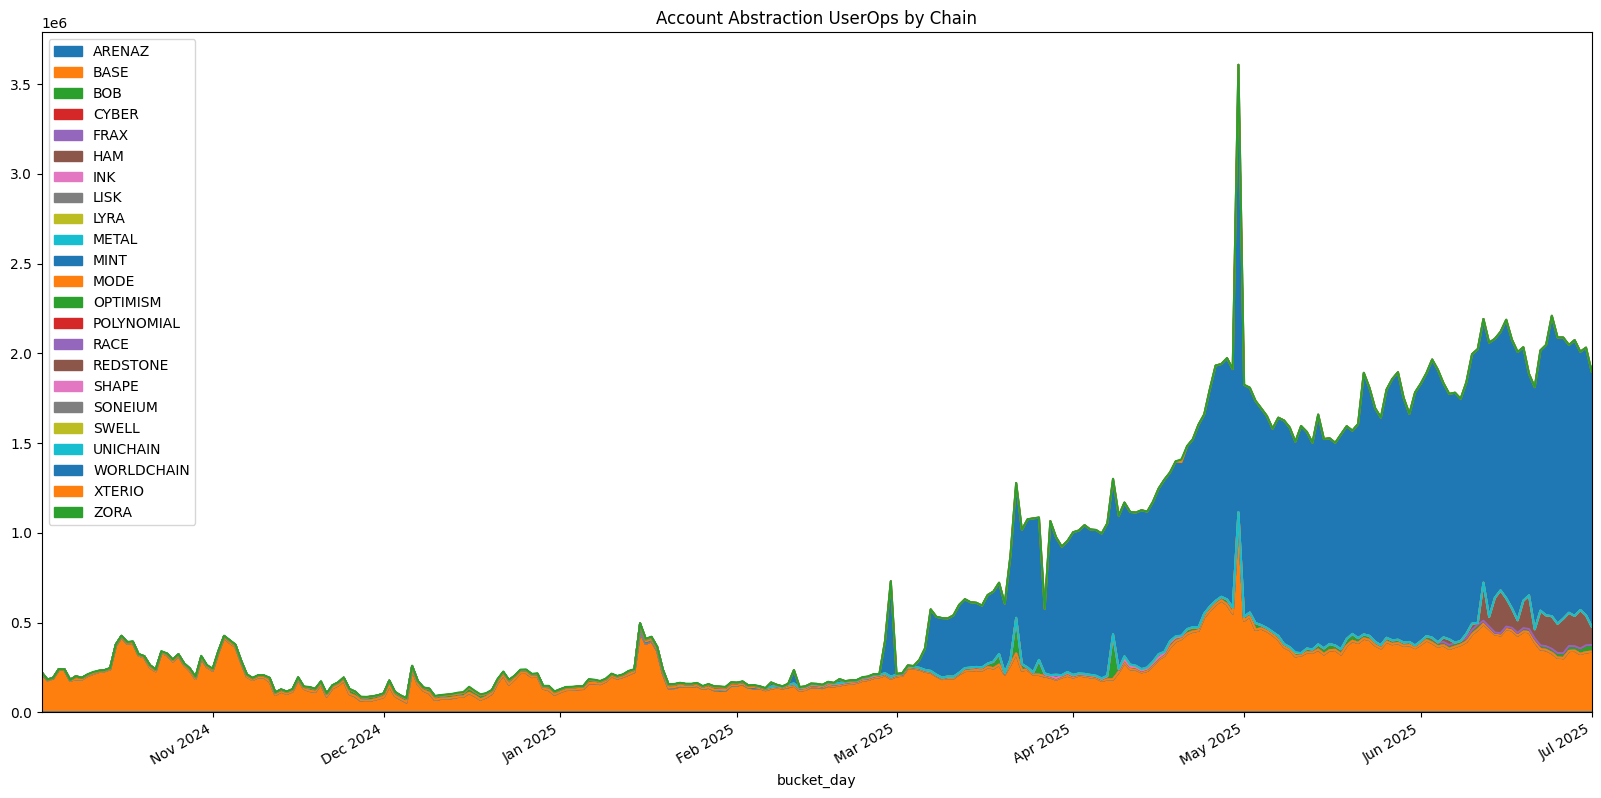

In [12]:
ax = df_ops.pivot_table(
    index='bucket_day',
    columns='chain',
    values='userops_count',
    aggfunc='sum',
    fill_value=0
).plot(
    kind='area',
    figsize=(20,10),
    title='Account Abstraction UserOps by Chain'
)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.set_xlim(pd.to_datetime('2024-10-02'), pd.to_datetime('2025-07-01'))
ax.legend(frameon=True, loc='upper left')

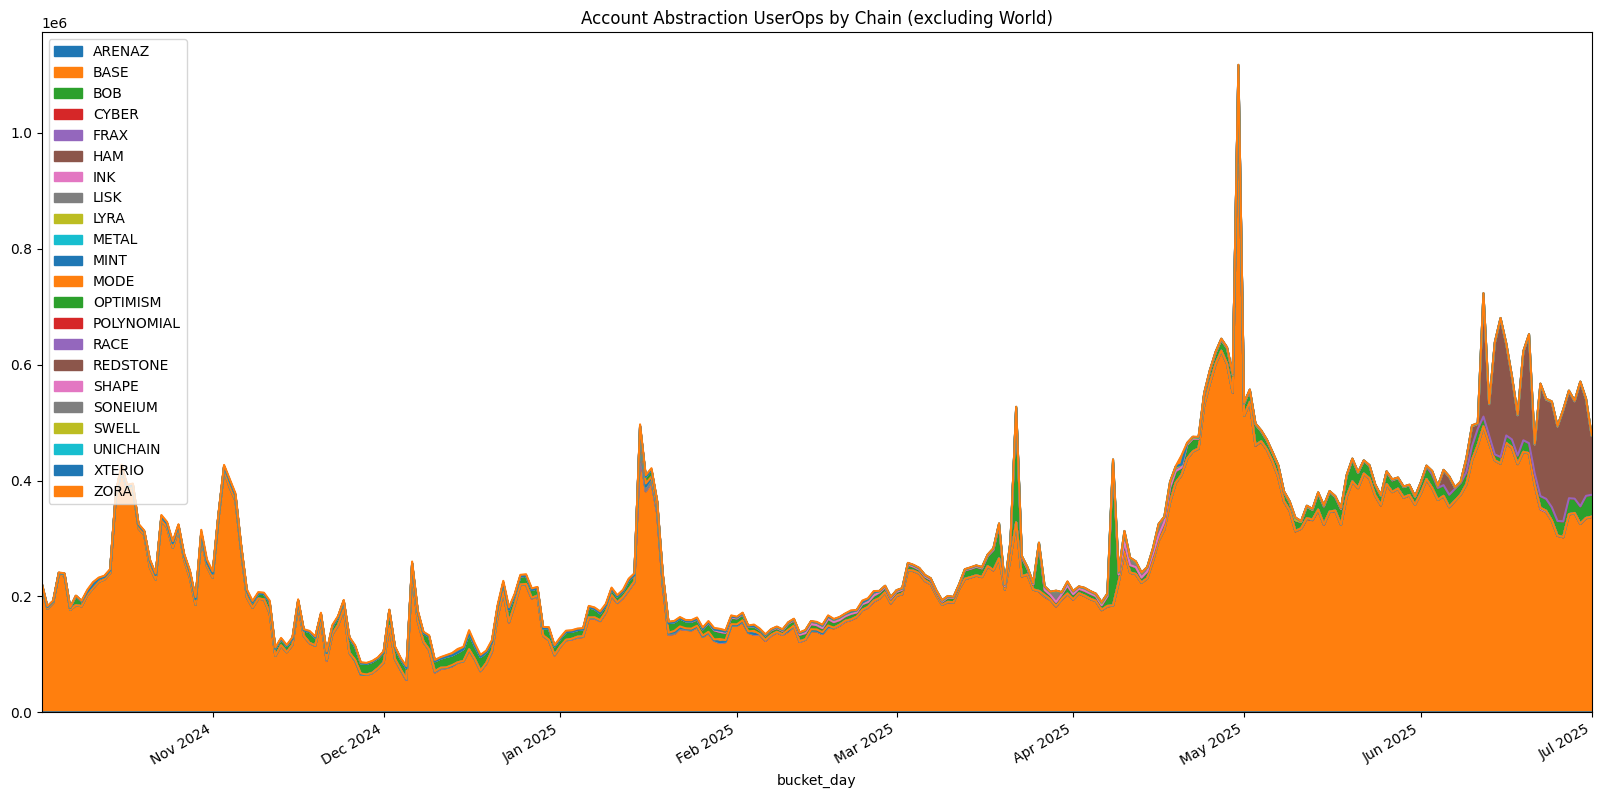

In [13]:
ax = df_ops.query("chain != 'WORLDCHAIN'").pivot_table(
    index='bucket_day',
    columns='chain',
    values='userops_count',
    aggfunc='sum',
    fill_value=0
).plot(
    kind='area',
    figsize=(20,10),
    title='Account Abstraction UserOps by Chain (excluding World)'
)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.set_xlim(pd.to_datetime('2024-10-02'), pd.to_datetime('2025-07-01'))
ax.legend(frameon=True, loc='upper left')

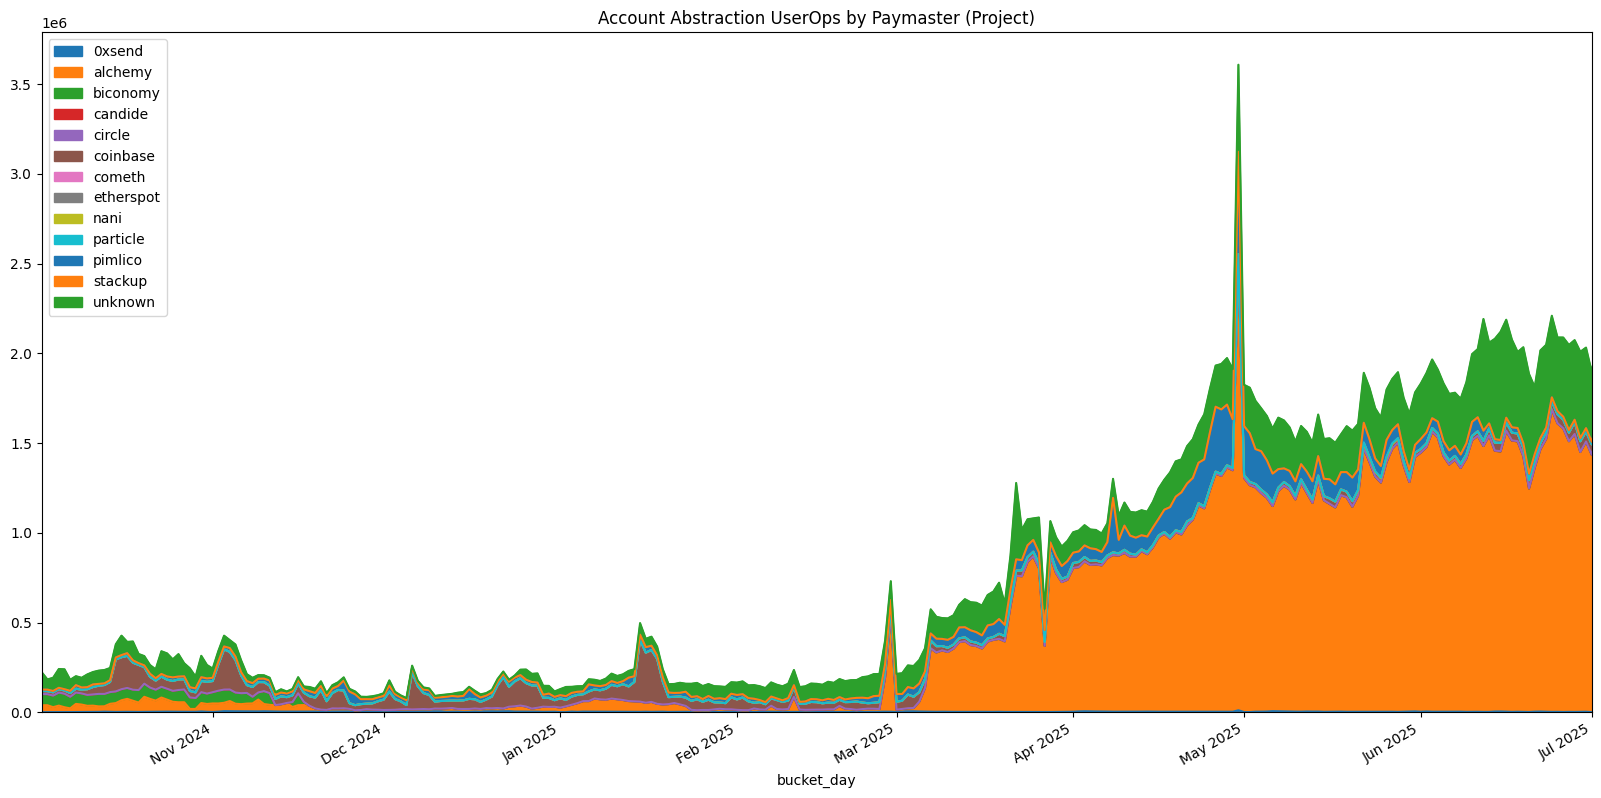

In [14]:
ax = df_ops.pivot_table(
    index='bucket_day',
    columns='owner_project',
    values='userops_count',
    aggfunc='sum',
    fill_value=0
).plot(
    kind='area',
    figsize=(20,10),
    title='Account Abstraction UserOps by Paymaster (Project)'
)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.set_xlim(pd.to_datetime('2024-10-02'), pd.to_datetime('2025-07-01'))
ax.legend(frameon=True, loc='upper left')